<a href="https://colab.research.google.com/github/Rashijain07/INTERNSAVY_Task2/blob/main/Customer_Dataset_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [6]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df=dataset.drop(columns=["CustomerID","Gender","Age"],axis=1)

In [9]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


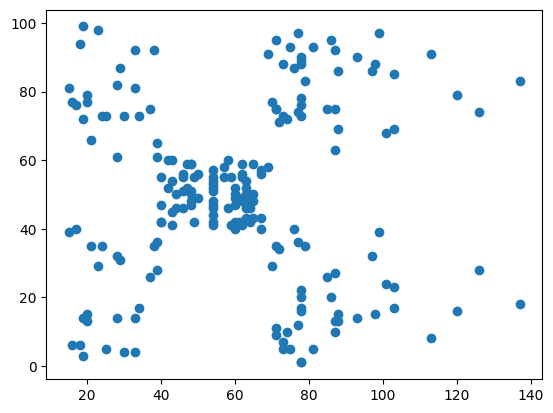

In [11]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.show()

In [12]:
import warnings
warnings.simplefilter("ignore")

In [13]:
wcss = []

for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [14]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30241.34361793658,
 25039.434641445507,
 21850.165282585636,
 19643.655552199736,
 17709.497519597862,
 16059.88822568746,
 14699.465490306793,
 12738.312658437659,
 11752.014544507216,
 11352.50599325855,
 10633.822759103634,
 9406.342557442558,
 8567.191210011179,
 8308.123082010581]

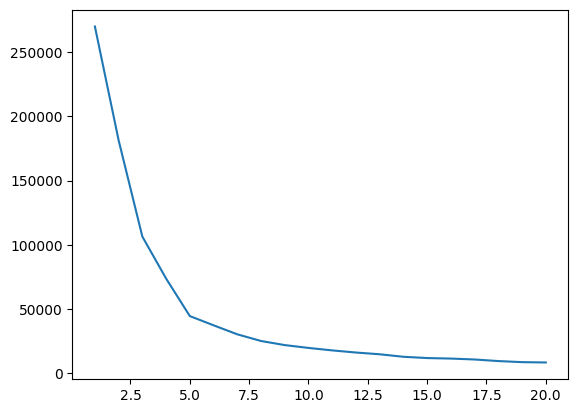

In [16]:
plt.plot(range(1,21),wcss)
plt.show()

In [17]:
X=df.iloc[:,:].values
km=KMeans(n_clusters=5)
y_means=km.fit_predict(X)


In [18]:
y_means

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [19]:
X[y_means == 3,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39])

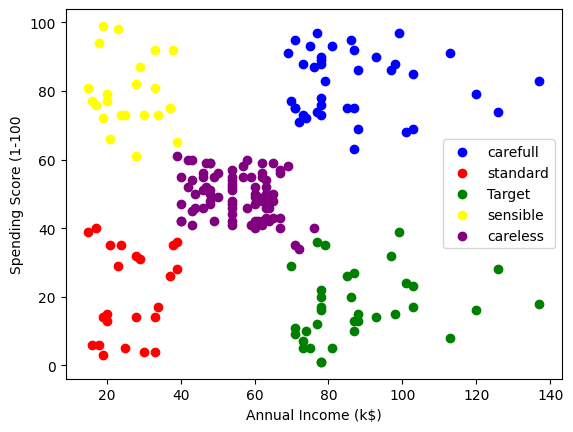

In [20]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue',label='carefull')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red',label='standard')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green',label='Target')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow',label='sensible')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='purple',label='careless')
plt.legend()
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100")
plt.show()

In [21]:
df["Target"]=y_means

In [22]:
df

,Annual Income (k$),Spending Score (1-100),Target
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1
...,...,...,...
195,120,79,0
196,126,28,2
197,126,74,0
198,137,18,2
